# コンピュータと音楽：松原担当分第4回

## 今日の目標
- これまでの復習と課題のフィードバック
- Markdown形式の復習
- Matplotlib, Seabornの練習
- Pandasの練習
- 計量音楽学（楽譜情報の統計分析）
- MIDIファイルから調推定を行う（本日の課題）

## Markdown形式
http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html

## Matplotlib
https://matplotlib.org  
MATLAB likeな作図ライブラリ

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### 作図の設定
rc(run command)設定を行う。  
設定できるパラメタについては  
`print(mpl.rcParams)`  
で確認する。

In [2]:
print(mpl.rcParams)

agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: mpeg4
animation.convert_args: []
animation.convert_path: convert
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.mencoder_args: []
animation.mencoder_path: mencoder
animation.writer: ffmpeg
axes.axisbelow: False
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.hold: True
axes.labelcolor: k
axes.labelpad: 5.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 1.0
axes.prop_cycle: cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.right: True
axes.spines.top: True
axes.titlesize: large
axes.titleweight: normal
axes.unicode_minus: True
axes.xmargin: 0.0
a

### 設定の変更例

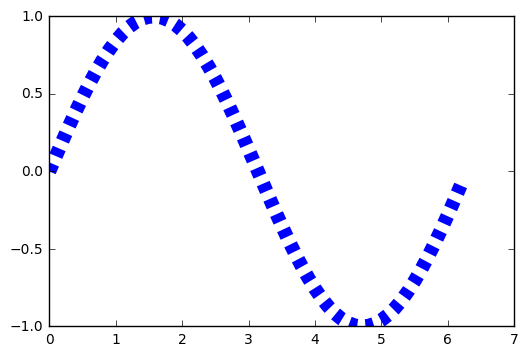

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np # sin関数を読み込むためにnumpyパッケージをimport

mpl.rcParams['lines.linewidth'] = 10    # a: 線幅を10 pointsに設定
mpl.rcParams['lines.linestyle'] = '--'  # b: 線種を破線に設定
mpl.rc('lines', linewidth=10, linestyle='--')  # aとbを一気に設定

t = np.arange(0, 2*np.pi, 0.1)
plt.figure(1)
plt.plot(t, np.sin(t))
plt.show()

matplotlibrcというファイルを作成すると、パラメタのデフォルト値を変更してmatplotlibを実行できる。なお変更したパラメタは`mpl.rcdefaults()`で戻すことができる。

スタイルシートによる設定方法もある。`print(plt.style.available)`で利用可能なスタイルを確認できる。

In [4]:
print(plt.style.available)

['fivethirtyeight', 'grayscale', 'dark_background', 'seaborn-paper', 'seaborn-darkgrid', 'seaborn-dark', 'seaborn-poster', 'seaborn-notebook', 'seaborn-muted', 'seaborn-talk', 'seaborn-colorblind', 'seaborn-deep', 'ggplot', 'bmh', 'seaborn-bright', 'seaborn-dark-palette', 'seaborn-white', 'seaborn-whitegrid', 'classic', 'seaborn-pastel', 'seaborn-ticks']


いくつか試して上のグラフ描画を再実行してみよう。

In [5]:
mpl.rcdefaults()
plt.style.use('ggplot')

日本語ラベルの入力の仕方(linux, mac)

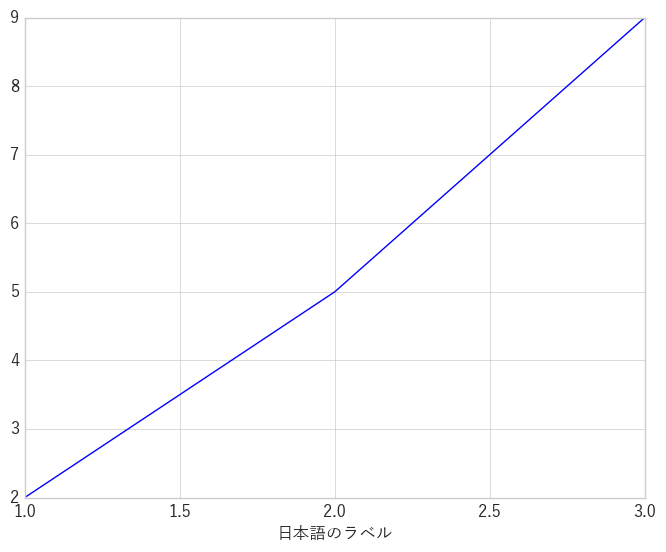

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcdefaults()
plt.style.use('seaborn-whitegrid')
font_path = '/Library/Fonts/Yu Gothic Medium.otf'  # 自分で使いたいフォントを選ぶ
font_prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()

plt.figure(1)
plt.plot([1,2,3],[2,5,9])
plt.xlabel('日本語のラベル')
plt.show()

## Seaborn
matplotlibよりも綺麗なグラフがかける  
http://seaborn.pydata.org/examples/index.html  
- distplot
- pointplot
- jointplot
- heatmap  
あたりを見ておくとよい

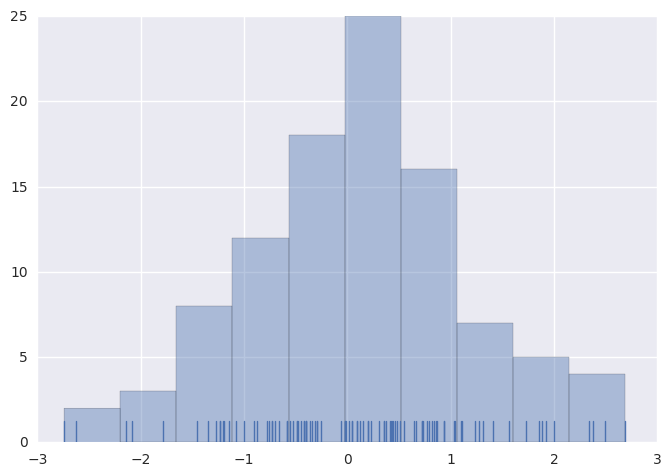

In [7]:
%matplotlib inline
import seaborn as sns
x = np.random.normal(size=100)
sns.distplot(x, kde=False, bins=10, rug=True)
sns.plt.show()

## Pandas
http://pandas.pydata.org  
1~3次元データ(時系列データ、csv、多次元配列、データベース)の入出力をサポートするライブラリ  
- シリーズ(1次元)
- データフレーム(2次元)
- パネル(3次元)

In [8]:
import pandas as pd

dat = pd.Series([1,3,6,12])
dat.index = ['a', 'b', 'c', 'd']
print(dat)

a     1
b     3
c     6
d    12
dtype: int64


In [9]:
df = pd.DataFrame([["day1","day2","day1","day2","day1","day2"],
              ["A","B","A","B","C","C"],
              [100,150,200,150,100,50],
              [120,160,100,180,110,80]] ).T
df.columns = ["day_no","class","score1","score2"]
df.index   = [11,12,13,14,15,16]
print(df)

   day_no class score1 score2
11   day1     A    100    120
12   day2     B    150    160
13   day1     A    200    100
14   day2     B    150    180
15   day1     C    100    110
16   day2     C     50     80


In [10]:
df.sort_values('score1')

,day_no,class,score1,score2
16,day2,C,50,80
11,day1,A,100,120
15,day1,C,100,110
12,day2,B,150,160
14,day2,B,150,180
13,day1,A,200,100


## MIDIファイルから楽譜情報を書き出す（前回の宿題）
```
Note:  Vel:   Dur : ch :  time
----:-----:-------:----:-------
C 6 :  84 : 0.250 :  0 : 1.250
B 5 :  84 : 0.250 :  0 : 1.500
A 5 :  84 : 0.250 :  0 : 1.750
G 5 :  84 : 0.250 :  0 : 2.000
.
.
.
```

### 解答例

In [11]:
import mido

mid = mido.MidiFile('./data/invention/BWV772.mid')
scale = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'H')
on_notes = dict()
delta = 240
score = []

for track in mid.tracks:
    e_time = 0
    for msg in track:
        e_time += msg.time
        if msg.type == 'note_on':
            if msg.note in on_notes: raise
            on_notes[msg.note] = e_time
        elif msg.type == 'note_off':
            if not msg.note in on_notes: raise
            on_time = on_notes.pop(msg.note)
            dur = (e_time - on_time) / delta
            score.append([msg.note, dur, msg.velocity, msg.channel, on_time / delta])
score.sort(key=lambda x:(x[4], x[0]))            
print('note :   dur : vel : ch :   time')
for note in score:
    print('{:>2} {} : {:>5.2f} : {:3} : {:>2} : {:>6.2f}'.
          format(scale[note[0]%12], note[0]//12, note[1], note[2], note[3], note[4]))

note :   dur : vel : ch :   time
 C 5 :  0.25 :  64 :  0 :   0.25
 D 5 :  0.25 :  64 :  0 :   0.50
 E 5 :  0.25 :  64 :  0 :   0.75
 F 5 :  0.25 :  64 :  0 :   1.00
 D 5 :  0.25 :  64 :  0 :   1.25
 E 5 :  0.25 :  64 :  0 :   1.50
 C 5 :  0.25 :  64 :  0 :   1.75
 G 5 :  0.50 :  64 :  0 :   2.00
 C 4 :  0.25 :  64 :  1 :   2.25
 D 4 :  0.25 :  64 :  1 :   2.50
 C 6 :  0.50 :  64 :  0 :   2.50
 E 4 :  0.25 :  64 :  1 :   2.75
 F 4 :  0.25 :  64 :  1 :   3.00
 H 5 :  0.12 :  64 :  0 :   3.00
 A 5 :  0.12 :  64 :  0 :   3.12
 D 4 :  0.25 :  64 :  1 :   3.25
 H 5 :  0.25 :  64 :  0 :   3.25
 E 4 :  0.25 :  64 :  1 :   3.50
 C 6 :  0.50 :  64 :  0 :   3.50
 C 4 :  0.25 :  64 :  1 :   3.75
 G 4 :  0.50 :  64 :  1 :   4.00
 D 6 :  0.25 :  64 :  0 :   4.00
 G 5 :  0.25 :  64 :  0 :   4.25
 G 3 :  0.50 :  64 :  1 :   4.50
 A 5 :  0.25 :  64 :  0 :   4.50
 H 5 :  0.25 :  64 :  0 :   4.75
 C 6 :  0.25 :  64 :  0 :   5.00
 A 5 :  0.25 :  64 :  0 :   5.25
 H 5 :  0.25 :  64 :  0 :   5.50
 G 5 :  0.

## 計量音楽学
分析したmidiファイルを色々なグラフに可視化して特徴を調べてみよう。

In [12]:
import pandas as pd
import mido

mid = mido.MidiFile('./data/invention/BWV772.mid')
scale = ('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'H')
on_notes = dict()
delta = 240
tmp_score = []

for track in mid.tracks:
    e_time = 0
    for msg in track:
        e_time += msg.time
        if msg.type == 'note_on':
            if msg.note in on_notes: raise
            on_notes[msg.note] = e_time
        elif msg.type == 'note_off':
            if not msg.note in on_notes: raise
            on_time = on_notes.pop(msg.note)
            dur = (e_time - on_time) / delta
            tmp_score.append([msg.note, 
                              scale[msg.note%12], 
                              msg.note//12, 
                              dur, 
                              msg.velocity, 
                              msg.channel, 
                              on_time / delta])

score = pd.DataFrame(tmp_score, columns=['noteID', 'note','octave','dur','vel','ch','time'])
score

,noteID,note,octave,dur,vel,ch,time
0,60,C,5,0.250,64,0,0.250
1,62,D,5,0.250,64,0,0.500
2,64,E,5,0.250,64,0,0.750
3,65,F,5,0.250,64,0,1.000
4,62,D,5,0.250,64,0,1.250
5,64,E,5,0.250,64,0,1.500
6,60,C,5,0.250,64,0,1.750
7,67,G,5,0.500,64,0,2.000
8,72,C,6,0.500,64,0,2.500
9,71,H,5,0.125,64,0,3.000


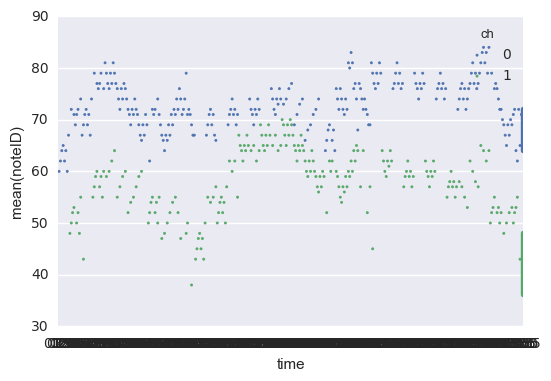

In [13]:
%matplotlib inline
import seaborn as sns

sns.pointplot(score.time, score.noteID, hue=score.ch, scale=0.2, join=False)

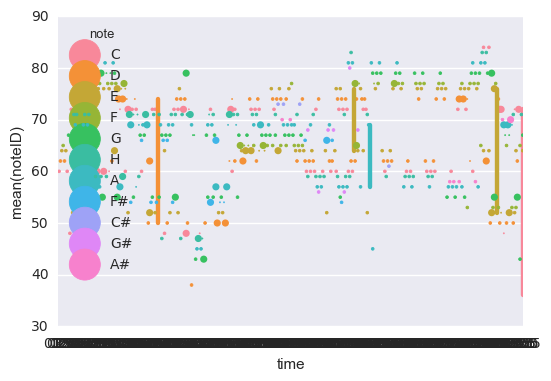

In [14]:
sns.pointplot(score.time, score.noteID, hue=score.note, scale=1*score.dur, join=False)

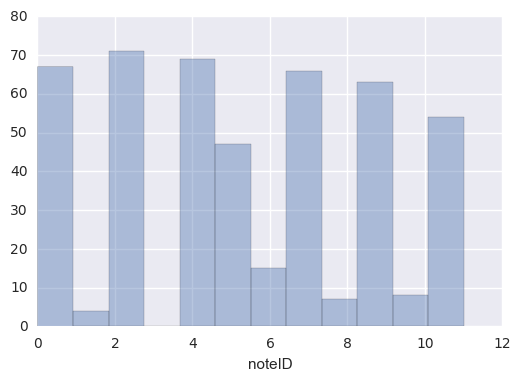

In [15]:
sns.distplot(score.noteID%12, kde=False, bins=12)


## 本日の課題
### 統計量から調推定を行う
Krumhansl-Kessler key profile 
Major: 6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52, 5.19, 2.39, 3.66, 2.29, 2.88  
Minor: 6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 2.54, 4.75, 3.98, 2.69, 3.34, 3.17  

Krumhansl, C.L., and E. J. Kessler, "Tracing the Dynamic Changes in Perceived Tonal Organization in a Spatial Representation of Musical Keys," Psychological Review 89 (1982): 334-368.


<img src="KKKeyprofile.gif">